# NumPy Assignment

You need to install `numpy` and `matplotlib` by `pip` first.

```bash
pip install numpy matplotlib
```

Then import them. Click Shift + Enter in each cell.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
print(np.__version__)

1.15.4


## 1. Array Creation

**Q1**: List plot the linear, quadratic, and cubic functions. The x-axis ranges from 0 to 1.

Hint: To get smooth curves, you need to generate 101 points (with equal distance) along x-axis and y-axis. For example, for linear function, the points are (0,0), (0.01,0.01), ..., (1,1).

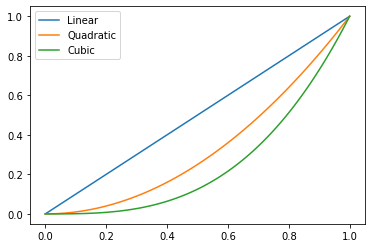

In [16]:
x = np.linspace(0, 1, 101)
y_linear = x
y_quad   = x ** 2
y_cubic  = x ** 3

# You need not modify the following codes
plt.plot(x,y_linear,label="Linear")
plt.plot(x,y_quad,label="Quadratic")
plt.plot(x,y_cubic,label="Cubic")
plt.legend()
plt.show()

## 2. Activation Functions

[Activation functions](https://en.wikipedia.org/wiki/Activation_function) are important for neural networks to change linear inputs to nonlinear space as to fit complex patterns, which will be covered in the next few courses.

**Q2**: In this part, you need to write several commonly used activation functions, including:
* sigmoid: $g(x)=\sigma(x)=\dfrac{1}{1+\mathrm{e}^{-x}}$

* tanh: $g(x)=\mathop{tanh}(x)=\dfrac{\mathrm{e}^x-\mathrm{e}^{-x}}{\mathrm{e}^x+\mathrm{e}^{-x}}$

* ReLU (Recitified Linear Unit): $g(x)=\begin{cases}0 & x<0\\ x & x\geq 0\end{cases}$

* Leaky RELU: $g(x)=\begin{cases}\alpha x & x<0\\ x & x\geq 0\end{cases}$

Notice: `x` is a vector/matrix, and you should perform the operations **element-wise**.

In [8]:
z = np.random.random((10,)) - 0.5

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def relu(x):
    x_ret = x.copy()
    x_ret[x_ret < 0] = 0
    return x_ret


def leaky_relu(alpha,x):
    x_ret = x.copy()
    x_ret[x_ret < 0] *= alpha
    return x_ret

In [10]:
print(z)
print(sigmoid(z))
print(tanh(z))
print(relu(z))
#print(z)
print(leaky_relu(0.01, z))

[ 0.24762091  0.2659193  -0.37312175 -0.28749671 -0.38070889 -0.0425816
 -0.4576789   0.32740104 -0.4413771   0.44237334]
[0.56159084 0.56609083 0.40778691 0.42861682 0.40595593 0.48935621
 0.3875366  0.58112688 0.39141288 0.6088244 ]
[ 0.24268098  0.25982367 -0.35671926 -0.27982916 -0.36332294 -0.04255589
 -0.42819056  0.31618357 -0.41478527  0.41560977]
[0.24762091 0.2659193  0.         0.         0.         0.
 0.         0.32740104 0.         0.44237334]
[ 2.47620910e-01  2.65919300e-01 -3.73121755e-03 -2.87496709e-03
 -3.80708894e-03 -4.25816034e-04 -4.57678898e-03  3.27401039e-01
 -4.41377099e-03  4.42373338e-01]


## 3. Least Squares Problem (Linear Regression)

We try to use gradient descent to solve the least squares problem.

Say you have 100 points $(x_i,y_i)$ on the plain, and you need to find a linear function

$$f(x)=y=Ax + b$$

to best fit these points, where $A$ and $b$ are the parameters need to be solved.

To get these points, execute the cell below. To simplify the problem, we only consider 2 dimensions here. (But after you learn matrix calculus, you should come back)

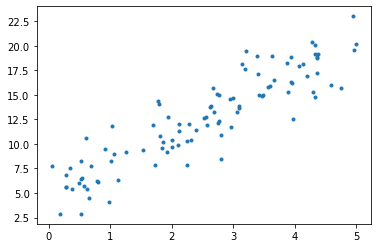

In [11]:
N = 100
x = 5 * np.random.random((N,)) # in vector form!
y = 5 + 3 * x + np.random.normal(0,2,(N,)) # add Gaussian noise to data
plt.plot(x,y,".")
plt.show()

Then how to define "best fit"? The easiest way is to use the mean square error (MSE). If the sum of the vertical distances from these points to the line is small, we say this line best fits these points.

Therefore, we obtain the target of this problem:

$$\min\frac{1}{2N}\sum_{i=1}^N\|f(x_i) - y_i\|_2^2=\min_{A,b}\frac{1}{2N}\sum_{i=1}^N(A x_i + b - y_i)^2$$

You can simply view the L2-norm $\|\cdot\|_2$ as the Euclidean distance of two points.

### Analytical Solution

Based on what you learn in calculus class, you can obtain the gradient of the target function (or loss function)

$$L(A,b) = \frac{1}{2N}\sum_{i=1}^N(A x_i + b - y_i)^2$$

**Q3**: Solve

$\begin{cases}
\partial L/\partial A=0\\
\partial L/\partial b=0
\end{cases}$

yourself and you can obtain the explicit/close-form solution, denoted as $\hat{A}$ and $\hat{b}$.
Based on the formula you solve, write corresponding code below.

Hint: Check if you get the correct derivatives, see [here](https://en.wikipedia.org/wiki/Ordinary_least_squares).

In [12]:
x_ = np.mean(x)
y_ = np.mean(y)
n = x.shape[0]

A_hat = (np.sum(x * y) - n * x_ * y_) / (np.sum(x ** 2)  -  n * x_ * x_)
b_hat = y_ - A_hat * x_

Check if your line correctly passes across the points

A_hat: 3.0596
b_hat: 4.8992


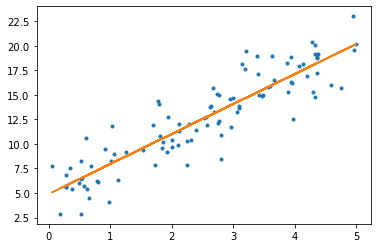

In [13]:
y_hat = A_hat * x + b_hat
print("A_hat: {:.4f}".format(float(A_hat)))
print("b_hat: {:.4f}".format(float(b_hat)))
plt.plot(x,y,".")
plt.plot(x,y_hat)
plt.show()

### Gradient Descent

The linear least square problem is so easy that we can directly solve for the close-form solutioin. However, for most of the optimization problems (including neural networks), we are hard to get the exact form of the solutions. Thus, we need to do some approximation, and gradually approach the best one through iteration. This is where **gradient descent** comes from.

Once you obtain the gradient of the loss function, you can use gradient descent to do optimization. Suppose you need to minimize the MSE function $L(A,b)$ above, what you need to do is randomly initialize a starting point, follow the gradient indicator (which implies the shape of the function), and go downward for a small step. At this new point, you check again for the gradient direction, and go down, so on and so forth. Finally, you can get to the valley of the function, where all the other points around you are higher than you, and the iteration stops.

![gradient descent](https://cdn-images-1.medium.com/max/1000/0*0ZJ6i6DWqhx-SL5N.gif)

Intuitively, you can the process of gradient descent as a ball rolling down the mountain.

The basic gradient descent can be formulated as

$$\theta^{(k+1)}=\theta^{(k)}-\alpha\nabla_\theta L$$

where $\theta$ is the parameter needed to be optimized, and $\alpha$ is the step size or learning rate. In our case, it becomes

$$\begin{cases}
A^{(k+1)}=A^{(k)}-\alpha\frac{\partial L(A,b)}{\partial A}\\
b^{(k+1)}=b^{(k)}-\alpha\frac{\partial L(A,b)}{\partial b}
\end{cases}$$

**Q4**: Based on the formulas, implement gradient descent below.

In [14]:
def cal_loss(x,y,A_hat,b_hat):
    """
    Helper function for calculating MSE loss
    """
    return np.mean((A_hat * x + b_hat - y) ** 2)

def gradient_descent(x,y,learning_rate=0.01,iterations=10000):
    """
    Gradient descent implementation
    """
    n = len(y)
    A_hat = np.random.random(1)
    b_hat = np.random.random(1)
    cost_history = np.zeros(iterations)

    for k in range(iterations):
        
        # Implement gradient descent here
        A_hat_new = A_hat - learning_rate * np.sum((A_hat * x + b_hat - y) * x) / n
        b_hat_new = b_hat - learning_rate * np.sum(A_hat * x + b_hat - y) / n
        
        cost_history[k] = cal_loss(x,y,A_hat_new,b_hat_new)
        A_hat = A_hat_new
        b_hat = b_hat_new
        
    return A_hat, b_hat, cost_history

You can visualize your results below.

A_hat: 3.0596
b_hat: 4.8992


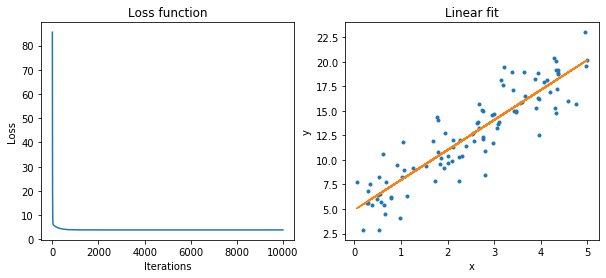

In [15]:
A_hat_grad, b_hat_grad, cost_history = gradient_descent(x,y)
print("A_hat: {:.4f}".format(float(A_hat_grad)))
print("b_hat: {:.4f}".format(float(b_hat_grad)))
plt.figure(figsize=(10,4))
# Loss function
plt.subplot(121)
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss function")
# Fit result
plt.subplot(122)
plt.plot(x,y,".")
plt.plot(x,A_hat_grad * x + b_hat_grad)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear fit")
plt.show()